# Implementing Feedforward neural networks with Keras and TensorFlow for  classification of hand-written MNIST dataset using below steps: 
* a. Import the necessary packages
* b. Load the training and testing data 
* c. Define the network architecture using Keras 
* d. Train the model using SGD with 11 epochs
* e. Evaluate the network 
* f. Plot the training loss and accuracy

## A. Import The Necessary Packages

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

import pandas as pd

## B. Load the training and testing data

In [2]:
test = pd.read_csv("../datasets/MNIST(Ass2&3)/mnist_test.csv")
train = pd.read_csv("../datasets/MNIST(Ass2&3)/mnist_train.csv")

In [3]:
x_train = train.drop("label", axis=1)
x_test = test.drop("label", axis=1)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
y_train = train["label"]
y_test = test["label"]

In [6]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
x_train.shape

(60000, 784)

In [8]:
model = Sequential([
    Dense(784, "relu"),
    Dense(64, "relu"),
    Dropout(0.2),
    Dense(10, "softmax")
])

2023-11-16 17:39:41.315959: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 17:39:41.316663: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.compile(SGD(), "categorical_crossentropy", metrics=["accuracy"])

In [10]:
M = model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10


2023-11-16 17:39:41.587826: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.


938/938 [==============================] - 6s 5ms/step - loss: 0.8342 - accuracy: 0.7734
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4013 - accuracy: 0.8863
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3293 - accuracy: 0.9066
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2853 - accuracy: 0.9196
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2574 - accuracy: 0.9273
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2328 - accuracy: 0.9339
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2132 - accuracy: 0.9399
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1980 - accuracy: 0.9444
Epoch 9/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1857 - accuracy: 0.9474
Epoch 10/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1737 - accuracy: 0.9504


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9582


[0.14222204685211182, 0.9581999778747559]

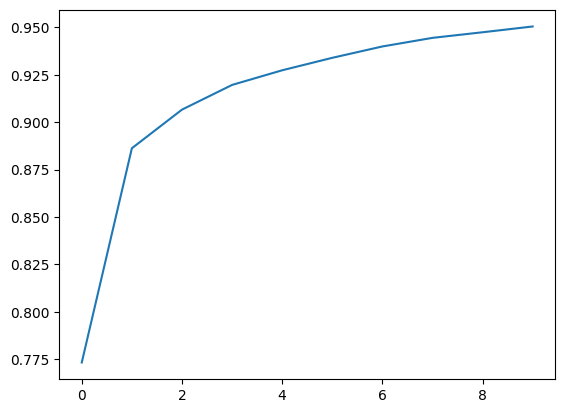

In [14]:
plt.plot(M.history["accuracy"])

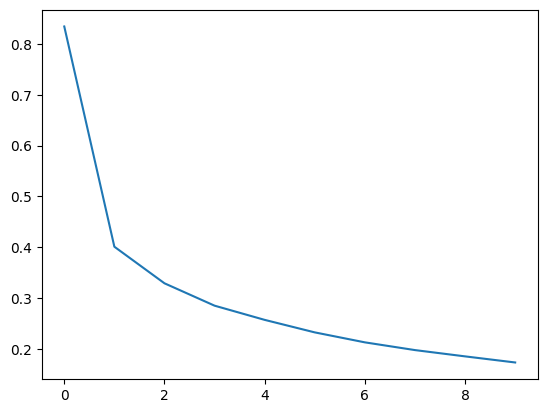

In [15]:
plt.plot(M.history["loss"])